In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
import numpy as np
import pandas as pd
import os

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\si

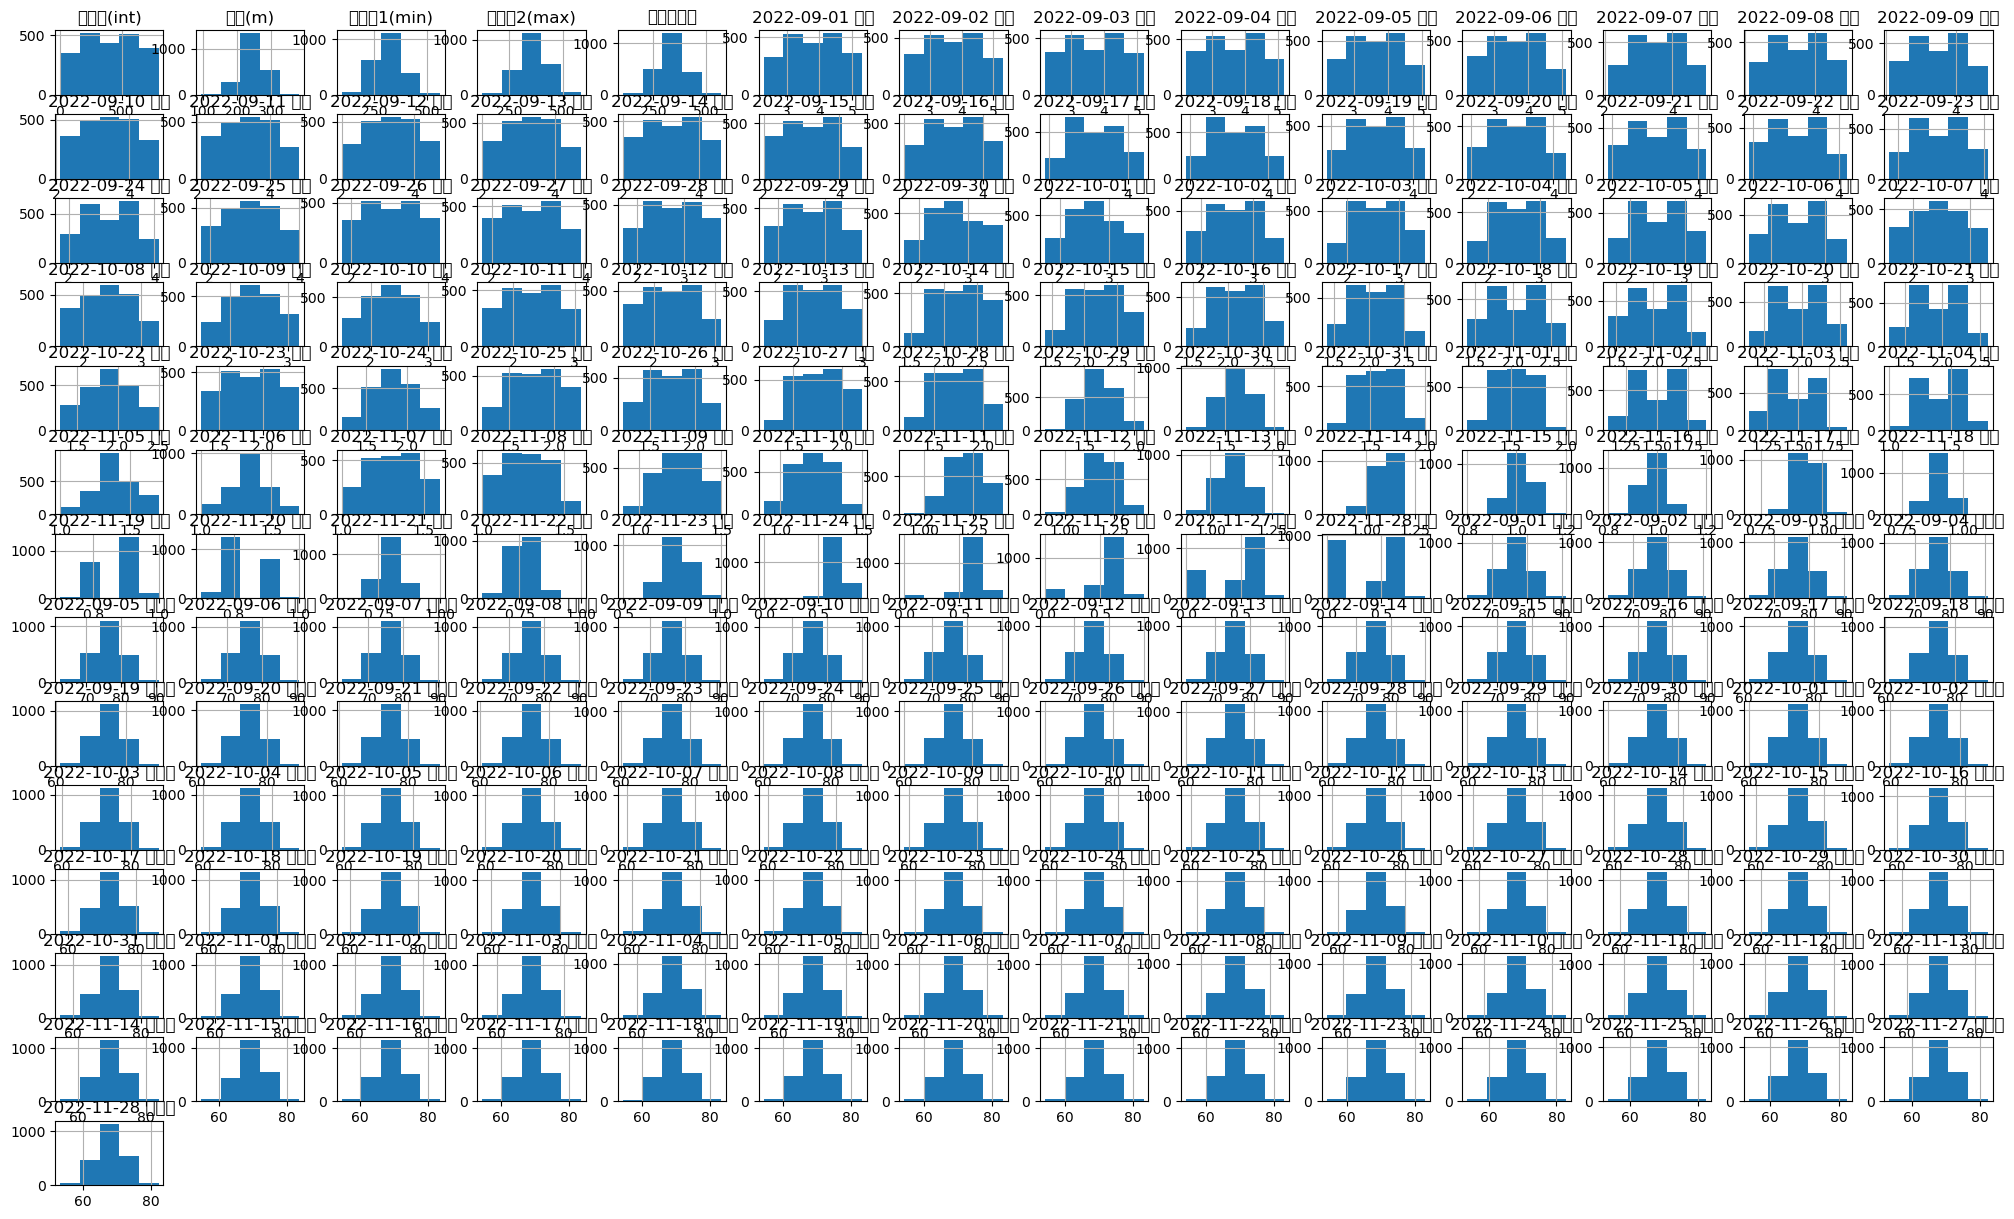

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=5, figsize=(25,15)) 
plt.show()

Train Data 내 상관관계 분석

In [7]:
corr_matrix=train.corr()
corr_matrix

,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
착과량(int),1.000000,0.007002,0.021279,0.037168,0.030611,-0.980777,-0.980766,-0.980633,-0.980772,-0.980526,...,-0.011129,-0.011098,-0.010823,-0.010763,-0.011184,-0.010697,-0.010635,-0.010350,-0.010035,-0.009969
수고(m),0.007002,1.000000,0.456394,0.484295,0.490456,-0.004329,-0.004161,-0.004863,-0.003260,-0.004864,...,0.021695,0.021659,0.021937,0.022443,0.022312,0.022316,0.022915,0.022803,0.022593,0.022428
수관폭1(min),0.021279,0.456394,1.000000,0.841330,0.957948,-0.017625,-0.015392,-0.017317,-0.015037,-0.017852,...,0.001020,0.001268,0.001151,0.001077,0.000732,0.000701,0.001012,0.000971,0.000502,0.000599
수관폭2(max),0.037168,0.484295,0.841330,1.000000,0.961049,-0.032941,-0.031595,-0.032226,-0.031397,-0.032521,...,-0.007773,-0.007796,-0.007836,-0.008202,-0.008366,-0.008514,-0.008198,-0.008068,-0.008396,-0.008324
수관폭평균,0.030611,0.490456,0.957948,0.961049,1.000000,-0.026499,-0.024643,-0.025962,-0.024356,-0.026392,...,-0.003605,-0.003490,-0.003571,-0.003804,-0.004067,-0.004161,-0.003835,-0.003786,-0.004200,-0.004113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24 엽록소,-0.010697,0.022316,0.000701,-0.008514,-0.004161,0.012965,0.011446,0.009071,0.012051,0.010318,...,0.999530,0.999619,0.999704,0.999803,0.999902,1.000000,0.999903,0.999806,0.999717,0.999623
2022-11-25 엽록소,-0.010635,0.022915,0.001012,-0.008198,-0.003835,0.012901,0.011357,0.008985,0.011960,0.010241,...,0.999425,0.999513,0.999597,0.999697,0.999799,0.999903,1.000000,0.999901,0.999808,0.999715
2022-11-26 엽록소,-0.010350,0.022803,0.000971,-0.008068,-0.003786,0.012622,0.011072,0.008711,0.011672,0.009955,...,0.999336,0.999428,0.999507,0.999607,0.999705,0.999806,0.999901,1.000000,0.999899,0.999802
2022-11-27 엽록소,-0.010035,0.022593,0.000502,-0.008396,-0.004200,0.012248,0.010720,0.008370,0.011297,0.009618,...,0.999252,0.999343,0.999422,0.999521,0.999615,0.999717,0.999808,0.999899,1.000000,0.999902


In [8]:
corr_matrix["착과량(int)"].sort_values(ascending=False).describe

<bound method NDFrame.describe of 착과량(int)         1.000000
2022-11-28 새순    0.769204
2022-11-27 새순    0.704241
2022-11-26 새순    0.603445
2022-11-24 새순    0.582726
                   ...   
2022-09-02 새순   -0.980766
2022-09-04 새순   -0.980772
2022-09-01 새순   -0.980777
2022-09-07 새순   -0.980784
2022-09-06 새순   -0.980885
Name: 착과량(int), Length: 183, dtype: float64>

상관관계가 높은 새순을 이용한 파생변수 생성


새순으로 만들수 있는 특징을 파생변수로 지정

In [9]:
leaf1=train.iloc[:,6:95]
leaf1

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,2.8,2.8,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,...,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6
1,3.3,3.3,3.3,3.2,3.2,3.1,3.1,3.1,3.0,3.0,...,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0,0.0,0.0
2,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,2.7,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
3,3.1,3.0,3.0,3.0,3.0,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7
4,3.7,3.6,3.6,3.6,3.5,3.5,3.5,3.4,3.4,3.3,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,4.7,4.6,4.5,4.5,4.4,4.4,4.3,4.3,4.2,4.2,...,0.8,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
2203,3.1,3.0,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6
2204,3.0,3.0,2.9,2.9,2.9,2.9,2.8,2.8,2.8,2.8,...,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6,0.5
2205,3.9,3.9,3.8,3.8,3.8,3.7,3.7,3.6,3.6,3.6,...,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.5,0.0


In [10]:
leaf_mean1=leaf1.mean(axis='columns')
leaf_mean1

0       1.693258
1       1.861798
2       1.762921
3       1.857303
4       2.125843
          ...   
2202    2.507865
2203    1.841573
2204    1.770787
2205    2.184270
2206    2.807865
Length: 2207, dtype: float64

In [11]:
leaf2=test.iloc[:,5:94]
leaf2

,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,2022-09-06 새순,2022-09-07 새순,2022-09-08 새순,2022-09-09 새순,2022-09-10 새순,...,2022-11-19 새순,2022-11-20 새순,2022-11-21 새순,2022-11-22 새순,2022-11-23 새순,2022-11-24 새순,2022-11-25 새순,2022-11-26 새순,2022-11-27 새순,2022-11-28 새순
0,4.3,4.2,4.2,4.1,4.1,4.1,4.0,4.0,3.9,3.9,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
1,2.5,2.5,2.5,2.5,2.5,2.4,2.4,2.4,2.4,2.4,...,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6
2,4.7,4.7,4.6,4.6,4.5,4.5,4.4,4.4,4.3,4.3,...,0.9,0.8,0.8,0.7,0.7,0.6,0.6,0.5,0.0,0.0
3,3.6,3.6,3.6,3.6,3.5,3.5,3.4,3.4,3.4,3.3,...,0.8,0.8,0.7,0.7,0.7,0.6,0.6,0.6,0.5,0.0
4,2.7,2.7,2.7,2.7,2.6,2.6,2.6,2.6,2.5,2.5,...,0.9,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2.5,2.5,2.4,2.4,2.4,2.4,2.3,2.3,2.3,2.3,...,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.6,0.6,0.6
2204,4.1,4.1,4.1,4.0,4.0,3.9,3.9,3.8,3.8,3.7,...,0.8,0.8,0.7,0.7,0.6,0.6,0.6,0.5,0.0,0.0
2205,3.8,3.8,3.8,3.7,3.7,3.7,3.6,3.6,3.5,3.5,...,0.9,0.9,0.8,0.8,0.8,0.7,0.7,0.7,0.6,0.6
2206,4.5,4.4,4.4,4.3,4.3,4.2,4.2,4.2,4.1,4.1,...,0.9,0.8,0.8,0.7,0.7,0.7,0.6,0.5,0.0,0.0


In [12]:
leaf_mean2=leaf2.mean(axis='columns')
leaf_mean2

0       2.330337
1       1.576404
2       2.569663
3       2.094382
4       1.692135
          ...   
2203    1.526966
2204    2.271910
2205    2.214607
2206    2.452809
2207    2.635955
Length: 2208, dtype: float64

In [13]:
leaf_max1 = leaf1.max(axis='columns')
leaf_max1

0       2.8
1       3.3
2       3.0
3       3.1
4       3.7
       ... 
2202    4.7
2203    3.1
2204    3.0
2205    3.9
2206    5.3
Length: 2207, dtype: float64

In [14]:
leaf_max2 = leaf2.max(axis='columns')
leaf_max2

0       4.3
1       2.5
2       4.7
3       3.6
4       2.7
       ... 
2203    2.5
2204    4.1
2205    3.8
2206    4.5
2207    4.9
Length: 2208, dtype: float64

In [15]:
leaf_std1 = leaf1.std(axis='columns')
leaf_std1

0       0.638143
1       0.894491
2       0.712611
3       0.692802
4       0.898171
          ...   
2202    1.248565
2203    0.712519
2204    0.723345
2205    1.021129
2206    1.441923
Length: 2207, dtype: float64

In [16]:
leaf_std2 = leaf2.std(axis='columns')
leaf_std2

0       1.139618
1       0.562467
2       1.276216
3       0.938248
4       0.613156
          ...   
2203    0.546843
2204    1.108745
2205    0.961362
2206    1.195550
2207    1.351199
Length: 2208, dtype: float64

In [17]:
leaf_gap1 = train.iloc[:,94] - train.iloc[:,6]
leaf_gap1

0      -2.2
1      -3.3
2      -2.5
3      -2.4
4      -3.1
       ... 
2202   -4.7
2203   -2.5
2204   -2.5
2205   -3.9
2206   -5.3
Length: 2207, dtype: float64

In [18]:
leaf_gap2 = test.iloc[:,93] - test.iloc[:,5]
leaf_gap2

0      -4.3
1      -1.9
2      -4.7
3      -3.6
4      -2.0
       ... 
2203   -1.9
2204   -4.1
2205   -3.2
2206   -4.5
2207   -4.9
Length: 2208, dtype: float64

In [19]:
leaf_median1 = leaf1.median(axis='columns')
leaf_median1

0       1.7
1       1.9
2       1.8
3       1.9
4       2.1
       ... 
2202    2.5
2203    1.9
2204    1.8
2205    2.2
2206    2.8
Length: 2207, dtype: float64

In [20]:
leaf_median2 = leaf2.median(axis='columns')
leaf_median2

0       2.3
1       1.6
2       2.6
3       2.1
4       1.7
       ... 
2203    1.5
2204    2.3
2205    2.2
2206    2.5
2207    2.7
Length: 2208, dtype: float64

In [21]:
train["새순 평균"] = leaf_mean1
test["새순 평균"] = leaf_mean2


In [22]:

train["새순 최대값"] = leaf_max1
test["새순 최대값"] = leaf_max2


In [23]:
train["새순 중간값"] = leaf_median1
test["새순 중간값"] = leaf_median2


In [24]:
train["새순 표준편차"] = leaf_std1
test["새순 표준편차"] = leaf_std2


In [25]:
train["새순 차이"] = leaf_gap1
test["새순 차이"] = leaf_gap2

In [26]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 평균,새순 최대값,새순 중간값,새순 표준편차,새순 차이
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.340491,70.293830,70.262422,70.169841,70.043251,1.693258,2.8,1.7,0.638143,-2.2
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,70.796630,70.597550,70.565088,70.560502,70.427600,1.861798,3.3,1.9,0.894491,-3.3
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,70.876723,70.710129,70.595971,70.418203,70.399578,1.762921,3.0,1.8,0.712611,-2.5
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.614644,69.455404,69.281590,69.238689,69.133970,1.857303,3.1,1.9,0.692802,-2.4
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,67.859963,67.775556,67.701456,67.504244,67.410093,2.125843,3.7,2.1,0.898171,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.008775,65.889675,65.734066,65.586656,65.560547,2.507865,4.7,2.5,1.248565,-4.7
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.088750,73.071705,73.069036,72.952559,72.944396,1.841573,3.1,1.9,0.712519,-2.5
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,66.933771,66.734617,66.572095,66.506006,66.479459,1.770787,3.0,1.8,0.723345,-2.5
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.248731,66.202532,66.108962,65.934979,65.812084,2.184270,3.9,2.2,1.021129,-3.9


In [27]:
train.shape

(2207, 189)

In [28]:
test.shape

(2208, 188)

Data 분할

In [29]:
from sklearn.model_selection import train_test_split
x = train[['새순 평균','새순 최대값', '새순 중간값', '새순 표준편차', '새순 차이']]
y = train[['착과량(int)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 7547)

모델 선택과 훈련

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
poly.get_feature_names()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x4^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x4^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2 x3^2',
 'x2 x3 x4',
 'x2 x4^2',
 'x3^3',
 'x3^2 x4',
 'x3 x4^2',
 'x4^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^3 x3',
 'x0^3 x4',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x1 x3',
 'x0^2 x1 x4',
 'x0^2 x2^2',
 'x0^2 x2 x3',
 'x0^2 x2 x4',
 'x0^2 x3^2',
 'x0^2 x3 x4',
 'x0^2 x4^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1^2 x3',
 'x0 x1^2 x4',
 'x0 x1 x2^2',
 'x0 x1 x2 x3',
 'x0 x1 x2 x4',
 'x0 x1 x3^2',
 'x0 x1 x3 x4',
 'x0 x1 x4^2',
 'x0 x2^3',
 'x0 x2^2 x3',
 'x0 x2^2 x4',
 'x0 x2 x3

In [31]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [32]:
test

,ID,수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,2022-09-05 새순,...,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 평균,새순 최대값,새순 중간값,새순 표준편차,새순 차이
0,TEST_0000,231.0,219.0,302.0,260.5,4.3,4.2,4.2,4.1,4.1,...,71.531618,71.476935,71.321237,71.184295,71.000223,2.330337,4.3,2.3,1.139618,-4.3
1,TEST_0001,206.0,324.0,346.0,335.0,2.5,2.5,2.5,2.5,2.5,...,67.879958,67.744820,67.673522,67.539973,67.447849,1.576404,2.5,1.6,0.562467,-1.9
2,TEST_0002,282.0,373.0,404.0,388.5,4.7,4.7,4.6,4.6,4.5,...,73.796143,73.615838,73.440136,73.387051,73.228319,2.569663,4.7,2.6,1.276216,-4.7
3,TEST_0003,234.0,337.0,357.0,347.0,3.6,3.6,3.6,3.6,3.5,...,72.924511,72.847411,72.838263,72.672156,72.538171,2.094382,3.6,2.1,0.938248,-3.6
4,TEST_0004,222.0,329.0,347.0,338.0,2.7,2.7,2.7,2.7,2.6,...,71.746813,71.668847,71.501043,71.419715,71.328224,1.692135,2.7,1.7,0.613156,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,TEST_2203,217.0,265.0,288.0,276.5,2.5,2.5,2.4,2.4,2.4,...,70.010219,69.916747,69.771722,69.737748,69.601365,1.526966,2.5,1.5,0.546843,-1.9
2204,TEST_2204,182.0,191.0,262.0,226.5,4.1,4.1,4.1,4.0,4.0,...,66.079592,65.951010,65.884988,65.719787,65.632342,2.271910,4.1,2.3,1.108745,-4.1
2205,TEST_2205,254.0,280.0,332.0,306.0,3.8,3.8,3.8,3.7,3.7,...,62.499735,62.421901,62.417195,62.323963,62.307955,2.214607,3.8,2.2,0.961362,-3.2
2206,TEST_2206,257.0,285.0,297.0,291.0,4.5,4.4,4.4,4.3,4.3,...,63.797809,63.762720,63.681733,63.512114,63.343589,2.452809,4.5,2.5,1.195550,-4.5


In [33]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소,새순 평균,새순 최대값,새순 중간값,새순 표준편차,새순 차이
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.340491,70.293830,70.262422,70.169841,70.043251,1.693258,2.8,1.7,0.638143,-2.2
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,70.796630,70.597550,70.565088,70.560502,70.427600,1.861798,3.3,1.9,0.894491,-3.3
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,70.876723,70.710129,70.595971,70.418203,70.399578,1.762921,3.0,1.8,0.712611,-2.5
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.614644,69.455404,69.281590,69.238689,69.133970,1.857303,3.1,1.9,0.692802,-2.4
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,67.859963,67.775556,67.701456,67.504244,67.410093,2.125843,3.7,2.1,0.898171,-3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.008775,65.889675,65.734066,65.586656,65.560547,2.507865,4.7,2.5,1.248565,-4.7
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.088750,73.071705,73.069036,72.952559,72.944396,1.841573,3.1,1.9,0.712519,-2.5
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,66.933771,66.734617,66.572095,66.506006,66.479459,1.770787,3.0,1.8,0.723345,-2.5
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.248731,66.202532,66.108962,65.934979,65.812084,2.184270,3.9,2.2,1.021129,-3.9


In [34]:
my_tangerine = [[1.693258, 2.8, 1.7, 0.638143, -2.2]]
my_predict = mlr.predict(my_tangerine)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
my_predict

array([[679.17608601]])

In [36]:
y_predict = mlr.predict(x_test)

모델 적용 및 성능평가

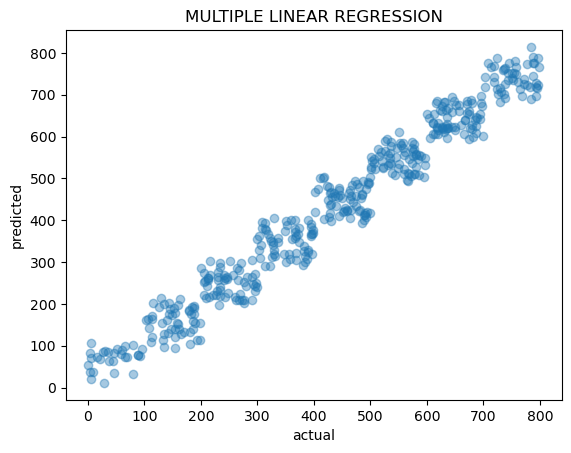

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [38]:
print(mlr.coef_)

[[-246.14809326  -28.18501687   33.33458048 -445.56527512    4.55404735]]


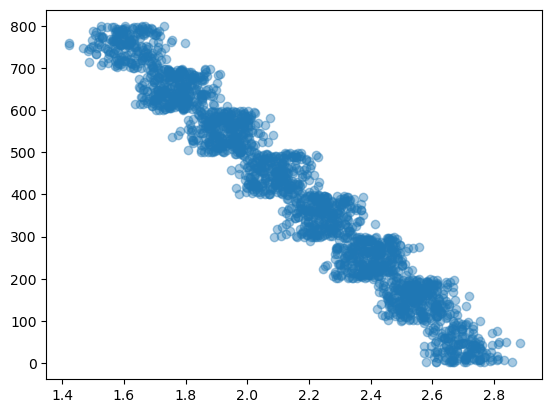

In [39]:
plt.scatter(train[['새순 평균']], train[['착과량(int)']], alpha=0.4)
plt.show()

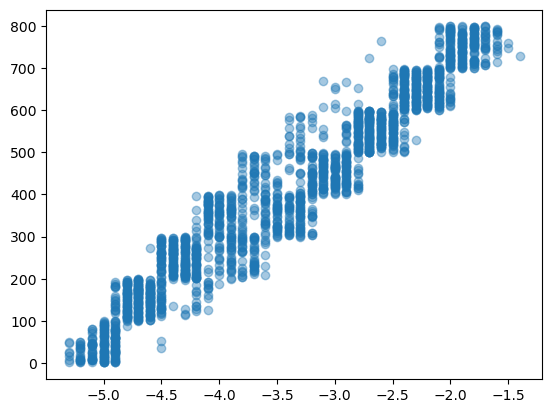

In [40]:
plt.scatter(train[['새순 차이']], train[['착과량(int)']], alpha=0.4)
plt.show()

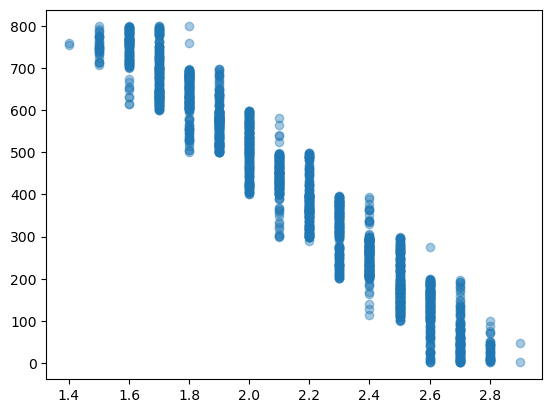

In [41]:
plt.scatter(train[['새순 중간값']], train[['착과량(int)']], alpha=0.4)
plt.show()

In [42]:
print(mlr.score(x_train, y_train))

0.9638096524501238


In [43]:
print(mlr.score(x_test, y_test))

0.9613761586717904


In [44]:
train = train.dropna()
test = test.fillna(0)

In [45]:
test = test.drop(['ID'], axis=1)

In [46]:
test = test.iloc[: , 182:188]

In [47]:
test

,새순 평균,새순 최대값,새순 중간값,새순 표준편차,새순 차이
0,2.330337,4.3,2.3,1.139618,-4.3
1,1.576404,2.5,1.6,0.562467,-1.9
2,2.569663,4.7,2.6,1.276216,-4.7
3,2.094382,3.6,2.1,0.938248,-3.6
4,1.692135,2.7,1.7,0.613156,-2.0
...,...,...,...,...,...
2203,1.526966,2.5,1.5,0.546843,-1.9
2204,2.271910,4.1,2.3,1.108745,-4.1
2205,2.214607,3.8,2.2,0.961362,-3.2
2206,2.452809,4.5,2.5,1.195550,-4.5


Test set 평가

In [48]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [49]:
pred = mlr.predict(test)
pred[:5]

array([[267.08033708],
       [748.14636408],
       [144.21180863],
       [431.13403439],
       [694.31524497]])

In [50]:
submission = pd.read_csv('sample_submission.csv')
submission['착과량(int)'] = pred
submission.to_csv('submit.csv',index=False)

In [51]:
sample_submission = pd.read_csv('./submit.csv')

In [52]:
sample_submission

,ID,착과량(int)
0,TEST_0000,267.080337
1,TEST_0001,748.146364
2,TEST_0002,144.211809
3,TEST_0003,431.134034
4,TEST_0004,694.315245
...,...,...
2203,TEST_2203,763.943379
2204,TEST_2204,301.765568
2205,TEST_2205,390.760350
2206,TEST_2206,212.131904
